# Аналитика в авиакомпании

###  Аналитика средствами Python
У вас есть файлы, в которых содержатся результаты запросов.
/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

Описание данных
База данных об авиаперевозках:
Таблица airports — информация об аэропортах:
* airport_code — трёхбуквенный код аэропорта
* airport_name — название аэропорта
* city — город
* timezone — временная зона

Таблица aircrafts — информация об самолётах:
* aircraft_code — код модели самолёта
* model — модель самолёта
* range — количество самолётов

Таблица tickets — информация о билетах:
* ticket_no — уникальный номер билета
* passenger_id — персональный идентификатор пассажира
* passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
* flight_id — уникальный идентификатор рейса
* departure_airport — аэропорт вылета
* departure_time — дата и время вылета
* arrival_airport — аэропорт прилёта
* arrival_time — дата и время прилёта
* aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»
* ticket_no — номер билета
* flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях
* festival_id — уникальный номер фестиваля
* festival_date — дата проведения фестиваля
* festival_city — город проведения фестиваля
* festival_name — название фестиваля

### Импортируем библиотеки и файлы данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
models_flights = pd.read_csv("/datasets/query_1.csv", sep=",")
citi_flights = pd.read_csv("/datasets/query_3.csv", sep=",")

### Изучаем данные и общую информацию

In [4]:
models_flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
display(models_flights)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
citi_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [7]:
display(citi_flights)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


### Проверить типы данных на корректность

In [8]:
models_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Типы данных:
    model - объект. тип  подходящий
    flights_amount - int64. тип подходящий

In [9]:
citi_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


city - объект. Тип подходящий
average_flights - дробное число. тип подходящий

### Выбрать топ-10 городов по количеству рейсов

#### Тренировка. ищу количество средних рейсов. по заданию же нужно найти абсолютное количество, это сделаем позднее

In [10]:
citi_flights_10 = citi_flights.sort_values('average_flights', ascending=False).head(10)

In [11]:
citi_flights_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Построить графики: 
* модели самолетов и количество рейсов, 
* города и количество рейсов, 
* топ-10 городов и количество рейсов

In [12]:
x = models_flights['model']
y = models_flights['flights_amount']

## модели самолетов и количество рейсов

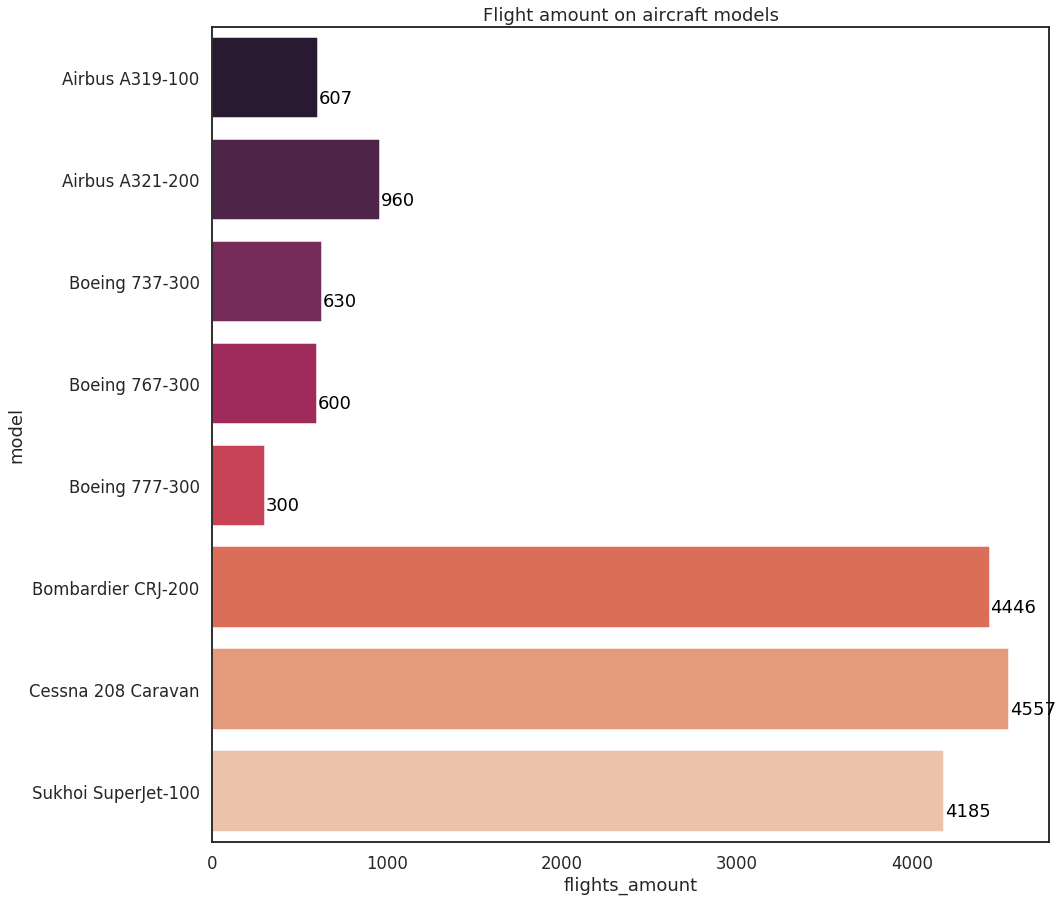

In [13]:
sns.set(style="white", context="talk")
f, (ax1) = plt.subplots(1, 1, figsize=(15, 15), sharex=True)

g=sns.barplot(y='model',x='flights_amount', data=models_flights, palette="rocket").set_title('Flight amount on aircraft models')
plt.ylabel('model')
plt.xlabel('flights_amount') 

for i, v in enumerate(y):
    ax1.text(v + 3, i + .25, str(v), color='black')
    
plt.show()

## Вывод по графику
* Больше всего полетов (>4000)  было сделано на моделях Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi Superject-100.
* Далее по убыванию количества полетов идут модели Airbus и Boeing (960-300 полетов)

Вероятно, модели из топ-3 предназначены для частых, и, возможно, непродолжительных полетов. Поэтому отличие в количестве полетов такое колоссальное.

## города и среднее количество рейсов

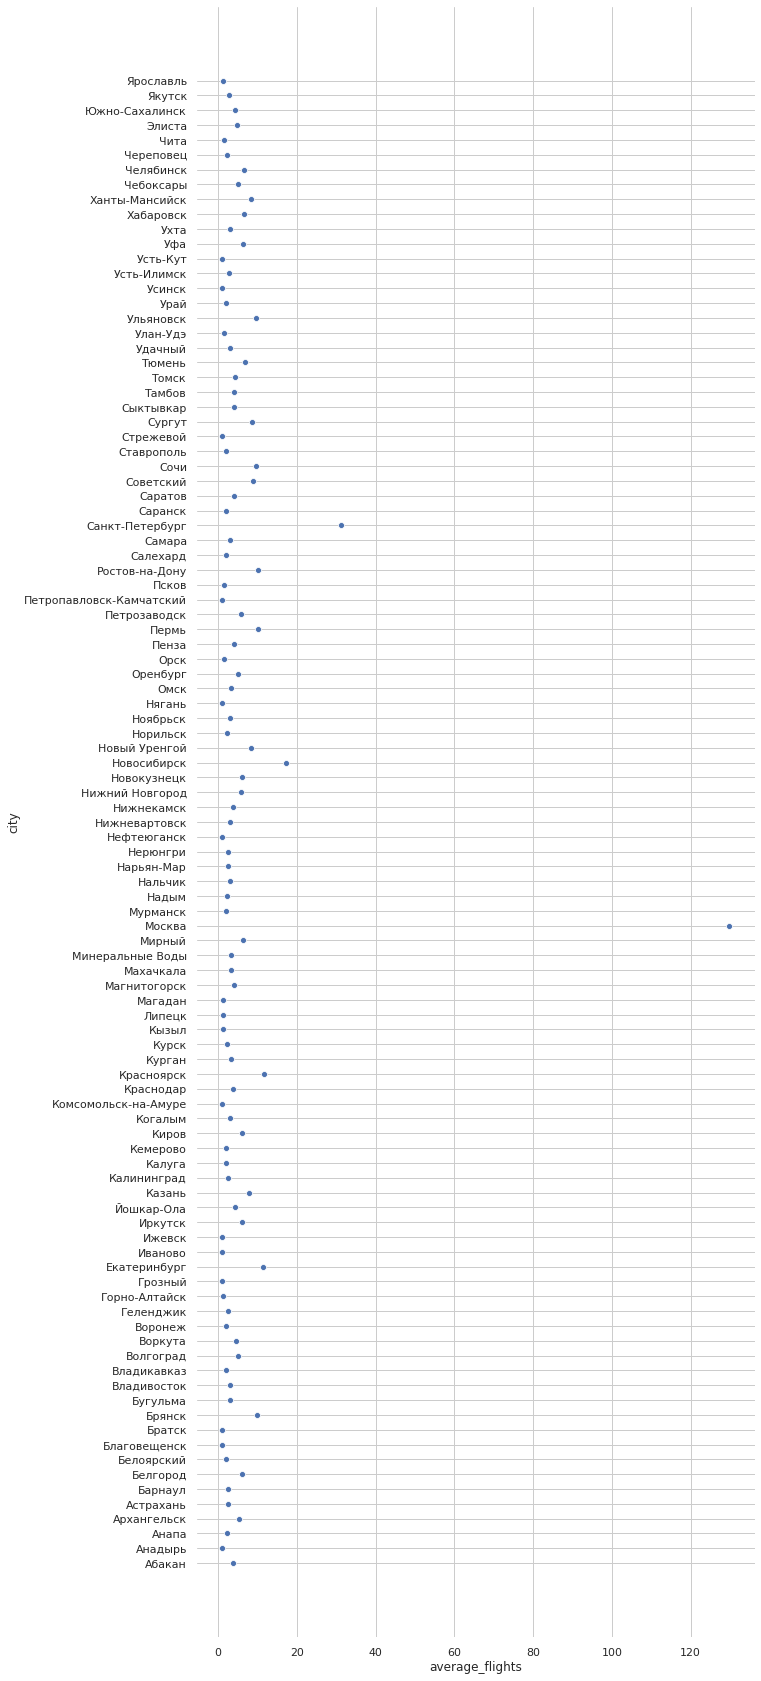

In [14]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 30))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="average_flights", y="city",
                palette="ch:r=-.2,d=.3_r",
                data=citi_flights, ax=ax)
plt.show()

## Выводы по графику
* Более 120 полетов в день в Москве
* В промежутке от 20 до 40 полетов в день в Санкт-Петербурге
* в остальных городах России менее 20 полетов в день

Каких-либо дополнительных выводов на этих данных построить не удается. Возможно, можно было бы вывести зависимость количества полетов от гео и населенности, но по условиям задачи это не требуется.

## Топ-10 городов и количество рейсов

In [15]:
x1 = citi_flights_10['city']
y1 = citi_flights_10['average_flights']

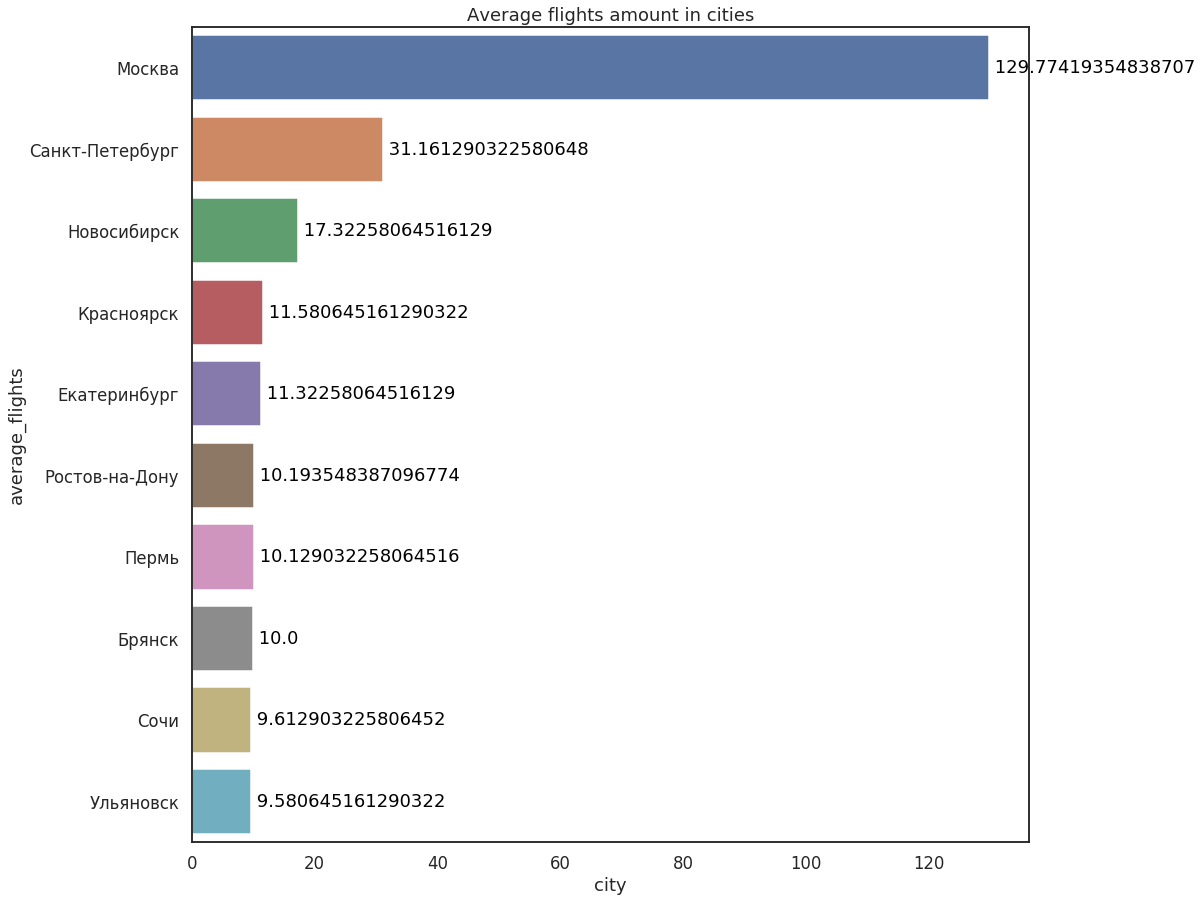

In [16]:
sns.set(style="white", context="talk")
f, (ax1) = plt.subplots(1, 1, figsize=(15, 15), sharex=True)

g=sns.barplot(y='city',x='average_flights', data=citi_flights_10, palette="deep").set_title('Average flights amount in cities')
plt.ylabel('average_flights')
plt.xlabel('city') 

for i, v in enumerate(y1):
     ax1.text(v, i, " "+str(v), color='black', va='center')


plt.show()

## Выводы из графика
* на графике видим в более крупном масштабе среднее количество полетов по убыванию
* на первом месте Москва, в которой совершается 4 раза больше полетов, чем в Санкт-Петербурге (всего 129 перелетов в среднем)
* На втором месте Санкт-Петербург с 31 перелетом в среднем
* на 3 месте Новосибирск в среднем 17 перелетами
* Далее с незначительным отличием оставшиеся участники топ-10 - Красноярск, Екатериньург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск со средним количество полетов от 9 до 11.

# Общий вывод:

в работе было проверено 2 датасета:

/datasets/query_1.csv — В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv - В нём содержится информация о:

* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Данные были: 

* импортированы;
* в типах данных аномалий не обнаружено;
* выбраны топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделаны выводы по каждому из графиков.

Данных для проверки каких-либо дополнительных гипотез не обнаружено.

--- 

ВЫВОДЫ ПРО ЧАСТОТУ ПОЛЕТОВ НА САМОЛЕТАХ
* Больше всего полетов (>4000)  было сделано на моделях Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi Superject-100.
* Далее по убыванию количества полетов идут модели Airbus и Boeing (960-300 полетов)

Вероятно, модели из топ-3 предназначены для частых, и, возможно, непродолжительных полетов. Поэтому отличие в количестве полетов такое колоссальное.

---

ВЫВОДЫ ПРО СРЕДНЕЕ КОЛИЧЕСТВО ПОЛЕТОВ П ГОРОДАМ
* Более 120 полетов в день в Москве
* В промежутке от 20 до 40 полетов в день в Санкт-Петербурге
* в остальных городах России менее 20 полетов в день

Каких-либо дополнительных выводов на этих данных построить не удается. Возможно, можно было бы вывести зависимость количества полетов от гео и населенности, но по условиям задачи это не требуется.

---

ВЫВОДЫ ИЗ ТОП-10 ГОРОДОВ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ ПЕРЕЛЕТОВ
* на графике видим в более крупном масштабе среднее количество полетов по убыванию
* на первом месте Москва, в которой совершается 4 раза больше полетов, чем в Санкт-Петербурге (всего 129 перелетов в среднем)
* На втором месте Санкт-Петербург с 31 перелетом в среднем
* на 3 месте Новосибирск в среднем 17 перелетами
* Далее с незначительным отличием оставшиеся участники топ-10 - Красноярск, Екатериньург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск со средним количество полетов от 9 до 11.
